## 1. Import Libraries
- In this section we import all the libraries needed to work on the data

In [355]:
#Code Block 1
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 100)
# display up to 100 columns in dataframe

## ClaimMasterTrans
- In this section we create ClaimMasterTrans using data from ClaimMaster and ClaimTransactions csv files

In [356]:
#Code Block 2
#import data from csv file to create dataframe
df_ClaimTrans = pd.read_csv('Data/ClaimTransactions.csv', index_col = None, header = 0)
df_ClaimTrans

,ClaimNumber,ExposureKey,MBasicPaidLoss,MBasicReserves,MLossAdjustmentExpense,MLossExposureClosedTotal,MLossExposureClosedWithoutPay,MLossExposureClosedWithPay,MLossExposureOpen,MPaidLoss,MReserves,MSalvageRecovery,MSubrogationRecovery,Right_ClaimID,ClaimantNumber,Right_CompanyNumber,CoverageCode,Right_CoverageEffectiveDate,Right_DateOfLoss,Right_DriverNumber,Right_LossState,Right_LossStateDescription,MonetaryCategory,Right_NotificationDate,PolicyNumber,Right_PolicyStateCode,Right_PolicyStateDescription,ReserveID,ReserveSequenceNumber,TransactionCode,TransactionCodeAction,TransactionDate,TransactionDateMonth,Right_VehicleID,Right_CLM_TRN_TYPE_L2,ClaimTransactionRowNumber
0,PA0002364104,CMP5039509953129217,0.0,0.00,0.0,0,0,0,0,0.0,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908
1,PA0002364104,CMP5039509953129217,0.0,0.00,0.0,0,0,0,0,0.0,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908
2,PA0002364104,CMP5039509953129217,0.0,0.00,0.0,0,0,0,0,0.0,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908
3,PA0002364104,CMP5039509953129217,0.0,0.00,0.0,0,0,0,0,0.0,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908
4,PA0002364104,CMP5039509953129217,0.0,2500.00,0.0,0,0,0,1,0.0,2500.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52302223,RE,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316595,PA0002382226,PD5041513953296572,0.0,-1203.06,0.0,1,0,1,0,0.0,-1203.06,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487885,RE,RESERVE,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922364
316596,PA0002382226,PD5041513953296572,0.0,-1203.06,0.0,1,0,1,0,0.0,-1203.06,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487885,RE,RESERVE,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922364
316597,PA0002382226,PD5041513953296572,0.0,0.00,0.0,0,0,0,0,0.0,0.00,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,9950548143,NT,CLOSE,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922372
316598,PA0002382226,PD5041513953296572,0.0,0.00,0.0,0,0,0,0,0.0,0.00,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,9950548143,NT,CLOSE,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922372


In [357]:
#Code Block 3
#Drop Duplicates for ClaimTrans based on ClaimTransactionRowNumber
df_ClaimTrans.drop_duplicates(subset ='ClaimTransactionRowNumber', keep='first', inplace= True)
df_ClaimTrans

,ClaimNumber,ExposureKey,MBasicPaidLoss,MBasicReserves,MLossAdjustmentExpense,MLossExposureClosedTotal,MLossExposureClosedWithoutPay,MLossExposureClosedWithPay,MLossExposureOpen,MPaidLoss,MReserves,MSalvageRecovery,MSubrogationRecovery,Right_ClaimID,ClaimantNumber,Right_CompanyNumber,CoverageCode,Right_CoverageEffectiveDate,Right_DateOfLoss,Right_DriverNumber,Right_LossState,Right_LossStateDescription,MonetaryCategory,Right_NotificationDate,PolicyNumber,Right_PolicyStateCode,Right_PolicyStateDescription,ReserveID,ReserveSequenceNumber,TransactionCode,TransactionCodeAction,TransactionDate,TransactionDateMonth,Right_VehicleID,Right_CLM_TRN_TYPE_L2,ClaimTransactionRowNumber
0,PA0002364104,CMP5039509953129217,0.00,0.00,0.0,0,0,0,0,0.00,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908
4,PA0002364104,CMP5039509953129217,0.00,2500.00,0.0,0,0,0,1,0.00,2500.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52302223,RE,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726844
8,PA0002364104,CMP5039509953129217,0.00,6720.00,0.0,0,0,0,0,0.00,6720.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52308893,RE,RESERVE,2018-08-15 00:00:00,2018-08-01 00:00:00,1,M,9726850
12,PA0002364104,CMP5039509953129217,5586.61,0.00,0.0,0,0,0,0,5586.61,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52324035,PL,PAYMENT,2018-08-22 00:00:00,2018-08-01 00:00:00,1,M,9726856
16,PA0002364104,CMP5039509953129217,0.00,-5586.61,0.0,0,0,0,0,0.00,-5586.61,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52324035,RE,PAYMENT,2018-08-22 00:00:00,2018-08-01 00:00:00,1,M,9726864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316585,PA0002382226,PD5041513953296572,0.00,1800.00,0.0,0,0,0,1,0.00,1800.00,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52428464,RE,RESERVE,2018-10-02 00:00:00,2018-10-01 00:00:00,1,M,9922340
316588,PA0002382226,PD5041513953296572,596.94,0.00,0.0,0,0,0,0,596.94,0.00,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487873,PL,PAYMENT,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922348
316591,PA0002382226,PD5041513953296572,0.00,-596.94,0.0,0,0,0,0,0.00,-596.94,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487873,RE,PAYMENT,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922356
316594,PA0002382226,PD5041513953296572,0.00,-1203.06,0.0,1,0,1,0,0.00,-1203.06,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487885,RE,RESERVE,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922364


In [358]:
#Code Block 4
#Create ClaimTransPaidLoss
ClaimTransPaidLoss = df_ClaimTrans.groupby(['ClaimNumber'])['MPaidLoss'].sum()


#Change ClaimTransactionRowNumber to float
df_ClaimTrans['ClaimTransactionRowNumber'] = df_ClaimTrans['ClaimTransactionRowNumber'].astype(float)

#Create ClaimTransCount
ClaimTransCount = df_ClaimTrans.groupby(['ClaimNumber'])['ClaimTransactionRowNumber'].count()

In [359]:
df_ClaimTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111124 entries, 0 to 316597
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ClaimNumber                    111124 non-null  object 
 1   ExposureKey                    111124 non-null  object 
 2   MBasicPaidLoss                 111124 non-null  float64
 3   MBasicReserves                 111124 non-null  float64
 4   MLossAdjustmentExpense         111124 non-null  float64
 5   MLossExposureClosedTotal       111124 non-null  int64  
 6   MLossExposureClosedWithoutPay  111124 non-null  int64  
 7   MLossExposureClosedWithPay     111124 non-null  int64  
 8   MLossExposureOpen              111124 non-null  int64  
 9   MPaidLoss                      111124 non-null  float64
 10  MReserves                      111124 non-null  float64
 11  MSalvageRecovery               111124 non-null  float64
 12  MSubrogationRecovery          

In [360]:
#Code Block 5
#Create dataframes for ClaimTransPaidLoss and ClaimTransCount
df_ClaimTransCount = pd.DataFrame(ClaimTransCount)
df_ClaimTransPaidLoss = pd.DataFrame(ClaimTransPaidLoss)

#Rename Columns for ClaimTransPaidLoss and ClaimTransCount
df_ClaimTransPaidLoss.rename (columns = {'MPaidLoss':'ClaimTransPaidLoss'}, inplace = True)
df_ClaimTransCount.rename (columns = {'ClaimTransactionRowNumber':'ClaimTransCount'}, inplace = True)


#merge new dataframes ClaimTransPaidLoss and ClaimTransCount to dataframe ClaimTrans
df_ClaimTrans = pd.merge(df_ClaimTrans, df_ClaimTransCount, how = 'left', on = 'ClaimNumber')
df_ClaimTrans = pd.merge(df_ClaimTrans, df_ClaimTransPaidLoss, how = 'left', on = 'ClaimNumber')
                                                         
df_ClaimTrans

,ClaimNumber,ExposureKey,MBasicPaidLoss,MBasicReserves,MLossAdjustmentExpense,MLossExposureClosedTotal,MLossExposureClosedWithoutPay,MLossExposureClosedWithPay,MLossExposureOpen,MPaidLoss,MReserves,MSalvageRecovery,MSubrogationRecovery,Right_ClaimID,ClaimantNumber,Right_CompanyNumber,CoverageCode,Right_CoverageEffectiveDate,Right_DateOfLoss,Right_DriverNumber,Right_LossState,Right_LossStateDescription,MonetaryCategory,Right_NotificationDate,PolicyNumber,Right_PolicyStateCode,Right_PolicyStateDescription,ReserveID,ReserveSequenceNumber,TransactionCode,TransactionCodeAction,TransactionDate,TransactionDateMonth,Right_VehicleID,Right_CLM_TRN_TYPE_L2,ClaimTransactionRowNumber,ClaimTransCount,ClaimTransPaidLoss
0,PA0002364104,CMP5039509953129217,0.00,0.00,0.0,0,0,0,0,0.00,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908.0,9,5086.61
1,PA0002364104,CMP5039509953129217,0.00,2500.00,0.0,0,0,0,1,0.00,2500.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52302223,RE,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726844.0,9,5086.61
2,PA0002364104,CMP5039509953129217,0.00,6720.00,0.0,0,0,0,0,0.00,6720.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52308893,RE,RESERVE,2018-08-15 00:00:00,2018-08-01 00:00:00,1,M,9726850.0,9,5086.61
3,PA0002364104,CMP5039509953129217,5586.61,0.00,0.0,0,0,0,0,5586.61,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52324035,PL,PAYMENT,2018-08-22 00:00:00,2018-08-01 00:00:00,1,M,9726856.0,9,5086.61
4,PA0002364104,CMP5039509953129217,0.00,-5586.61,0.0,0,0,0,0,0.00,-5586.61,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52324035,RE,PAYMENT,2018-08-22 00:00:00,2018-08-01 00:00:00,1,M,9726864.0,9,5086.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111119,PA0002382226,PD5041513953296572,0.00,1800.00,0.0,0,0,0,1,0.00,1800.00,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52428464,RE,RESERVE,2018-10-02 00:00:00,2018-10-01 00:00:00,1,M,9922340.0,6,596.94
111120,PA0002382226,PD5041513953296572,596.94,0.00,0.0,0,0,0,0,596.94,0.00,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487873,PL,PAYMENT,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922348.0,6,596.94
111121,PA0002382226,PD5041513953296572,0.00,-596.94,0.0,0,0,0,0,0.00,-596.94,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487873,RE,PAYMENT,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922356.0,6,596.94
111122,PA0002382226,PD5041513953296572,0.00,-1203.06,0.0,1,0,1,0,0.00,-1203.06,0.0,0.0,50415139,53296572,91,PD,2018-10-01 00:00:00,2018-10-01 00:00:00,98,VT,Vermont,Loss,2018-10-02 11:35:12,VlQzOTkyMDU0,VT,Vermont,51001244,52487885,RE,RESERVE,2018-10-25 00:00:00,2018-10-01 00:00:00,1,M,9922364.0,6,596.94


In [361]:
#Code Block 6
#Change ClaimTransactionRowNumber to float
df_ClaimTrans['ClaimTransCount'] = df_ClaimTrans['ClaimTransCount'].astype(float)

#df_ClaimTrans info
df_ClaimTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111124 entries, 0 to 111123
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ClaimNumber                    111124 non-null  object 
 1   ExposureKey                    111124 non-null  object 
 2   MBasicPaidLoss                 111124 non-null  float64
 3   MBasicReserves                 111124 non-null  float64
 4   MLossAdjustmentExpense         111124 non-null  float64
 5   MLossExposureClosedTotal       111124 non-null  int64  
 6   MLossExposureClosedWithoutPay  111124 non-null  int64  
 7   MLossExposureClosedWithPay     111124 non-null  int64  
 8   MLossExposureOpen              111124 non-null  int64  
 9   MPaidLoss                      111124 non-null  float64
 10  MReserves                      111124 non-null  float64
 11  MSalvageRecovery               111124 non-null  float64
 12  MSubrogationRecovery          

In [362]:
#Code Block 7
#import ClaimMaster data
df_ClaimMaster = pd.read_csv('Data/ClaimMaster.csv', index_col = None, header = 0)

#Drop duplicates based on ClainNumber
df_ClaimMaster.drop_duplicates (subset ='ClaimNumber', keep='first', inplace= True)

#Change DateofLoss and TermEffectiveDate to Datetime64
df_ClaimMaster['DateOfLoss'] = pd.to_datetime(df_ClaimMaster['DateOfLoss'])
df_ClaimMaster['TermEffectiveDate'] = pd.to_datetime(df_ClaimMaster['TermEffectiveDate'])

#Create DaysToClaim colunm 
df_ClaimMaster['DaysToClaim'] = df_ClaimMaster['DateOfLoss'] - df_ClaimMaster['TermEffectiveDate']
df_ClaimMaster['DaysToClaim'] = df_ClaimMaster['DaysToClaim'].astype('timedelta64[h]').astype('float')/24

#Create DaysToClaim_h
df_ClaimMaster['DaysToClaim_h'] = (df_ClaimMaster['DateOfLoss'] - df_ClaimMaster['TermEffectiveDate'])
df_ClaimMaster['DaysToClaim_h'] = pd.to_timedelta(df_ClaimMaster['DaysToClaim_h']).astype('timedelta64[h]').astype('int64')


df_ClaimMaster


,ClaimNumber,AdjusterID,AtFault,AtFaultDescription,ClaimStatus,ClaimStatusDate,ClaimSystem,ClaimType,CompanyNumber,CoverageEffectiveDate,DateOfLoss,DriverID,EntryDate,LossState,LossStateDescription,NotificationDate,OpenDate,PolicyNumber,PolicyStateCode,PolicyStateDescription,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimID,CLM_TRN_TYPE_L2,DaysToClaim,DaysToClaim_h
0,PA0002364104,50013308,10004,No fault,C,2018-09-06 11:34:15,ClaimCommander,HAIL,45,2018-08-06 00:00:00,2018-08-06,98,2018-08-13 10:22:49,CO,Colorado,2018-08-13 10:22:48,2018-08-13 17:39:26,Q080MDE1MTY2,CO,Colorado,NO,2018-05-29,1,50395099,M,69.0,1656
4,PA0002351705,50012002,10003,Insured at fault,C,2018-07-10 09:12:45,ClaimCommander,PG_IVREARENDCV,45,2018-05-24 00:00:00,2018-05-24,1,2018-07-09 12:55:39,CO,Colorado,2018-07-09 12:55:38,2018-07-09 14:41:10,Q080MDEwOTEx,CO,Colorado,NO,2018-05-24,1,50382015,M,0.0,0
6,PA0002344011,50009306,10003,Insured at fault,C,2019-03-27 14:11:41,ClaimCommander,PG_COLLISIONINTERSECTION,45,2018-06-17 00:00:00,2018-06-17,1,2018-06-18 10:42:34,CO,Colorado,2018-06-18 10:42:31,2018-06-18 11:04:09,Q080MDExOTIz,CO,Colorado,NO,2018-05-25,1,50373347,M,23.0,552
8,PA0002348918,50008202,10004,No fault,C,2018-07-05 17:33:58,ClaimCommander,HAIL,45,2018-06-19 00:00:00,2018-06-19,98,2018-06-29 19:04:17,CO,Colorado,2018-06-29 19:04:16,2018-06-29 19:11:32,Q080MDIyMDcw,CO,Colorado,YES,2018-06-01,2,50378984,M,18.0,432
13,PA0002348997,50001361,10004,No fault,C,2018-07-02 12:52:18,ClaimCommander,GLASSBREAKAGE,45,2018-06-30 00:00:00,2018-06-30,1,2018-06-30 11:05:48,CO,Colorado,2018-06-30 11:05:48,2018-06-30 11:13:11,Q080MDIyMDcw,CO,Colorado,NO,2018-06-01,2,50379070,M,29.0,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30897,PA0002366306,50013427,10004,No fault,C,2018-08-20 10:18:34,ClaimCommander,VEHCOLLISION,91,2018-07-31 00:00:00,2018-08-18,1,2018-08-18 18:27:08,NH,New Hampshire,2018-08-18 18:27:07,2018-08-18 18:36:23,VlQzOTQzOTAy,VT,Vermont,NO,2018-04-06,1,50397599,M,134.0,3216
30898,PA0002350290,50018513,10003,Insured at fault,C,2018-07-12 08:58:57,ClaimCommander,FALLINGOBJECT,91,2018-07-03 00:00:00,2018-07-03,0,2018-07-04 18:29:35,NH,New Hampshire,2018-07-04 18:29:35,2018-07-04 18:36:14,VlQzOTc5NTgz,VT,Vermont,NO,2018-05-01,2,50380471,M,63.0,1512
30899,PA0002325076,50009112,10003,Insured at fault,C,2018-05-30 19:32:40,ClaimCommander,FIXEDOBJCOLL,91,2018-04-21 00:00:00,2018-04-21,99,2018-04-26 10:38:35,VT,Vermont,2018-04-26 10:38:33,2018-04-26 15:28:15,VlQzOTcyODE2,VT,Vermont,NO,2018-04-21,1,50353211,M,0.0,0
30901,PA0002373454,50017402,10001,Other party at fault,C,2018-10-23 14:55:14,ClaimCommander,PG_CVREARENDIV,91,2018-09-07 00:00:00,2018-09-07,1,2018-09-07 20:11:05,VT,Vermont,2018-09-07 20:11:05,2018-09-07 20:26:55,VlQzOTg0NzI5,VT,Vermont,NO,2018-05-04,1,50405565,M,126.0,3024


In [363]:
df_ClaimMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11069 entries, 0 to 30902
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ClaimNumber             11069 non-null  object        
 1   AdjusterID              11069 non-null  int64         
 2   AtFault                 11069 non-null  int64         
 3   AtFaultDescription      11069 non-null  object        
 4   ClaimStatus             11069 non-null  object        
 5   ClaimStatusDate         11069 non-null  object        
 6   ClaimSystem             11069 non-null  object        
 7   ClaimType               11069 non-null  object        
 8   CompanyNumber           11069 non-null  int64         
 9   CoverageEffectiveDate   11069 non-null  object        
 10  DateOfLoss              11069 non-null  datetime64[ns]
 11  DriverID                11069 non-null  int64         
 12  EntryDate               11069 non-null  object

In [364]:
#Code Block 7
#Merge ClaimMaster and ClaimTrans to create ClaimMasterTrans
df_ClaimMasterTrans = pd.merge(df_ClaimMaster, df_ClaimTrans, how = 'inner', on = 'ClaimNumber')
df_ClaimMasterTrans

,ClaimNumber,AdjusterID,AtFault,AtFaultDescription,ClaimStatus,ClaimStatusDate,ClaimSystem,ClaimType,CompanyNumber,CoverageEffectiveDate,DateOfLoss,DriverID,EntryDate,LossState,LossStateDescription,NotificationDate,OpenDate,PolicyNumber_x,PolicyStateCode,PolicyStateDescription,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimID,CLM_TRN_TYPE_L2,DaysToClaim,DaysToClaim_h,ExposureKey,MBasicPaidLoss,MBasicReserves,MLossAdjustmentExpense,MLossExposureClosedTotal,MLossExposureClosedWithoutPay,MLossExposureClosedWithPay,MLossExposureOpen,MPaidLoss,MReserves,MSalvageRecovery,MSubrogationRecovery,Right_ClaimID,ClaimantNumber,Right_CompanyNumber,CoverageCode,Right_CoverageEffectiveDate,Right_DateOfLoss,Right_DriverNumber,Right_LossState,Right_LossStateDescription,MonetaryCategory,Right_NotificationDate,PolicyNumber_y,Right_PolicyStateCode,Right_PolicyStateDescription,ReserveID,ReserveSequenceNumber,TransactionCode,TransactionCodeAction,TransactionDate,TransactionDateMonth,Right_VehicleID,Right_CLM_TRN_TYPE_L2,ClaimTransactionRowNumber,ClaimTransCount,ClaimTransPaidLoss
0,PA0002364104,50013308,10004,No fault,C,2018-09-06 11:34:15,ClaimCommander,HAIL,45,2018-08-06 00:00:00,2018-08-06,98,2018-08-13 10:22:49,CO,Colorado,2018-08-13 10:22:48,2018-08-13 17:39:26,Q080MDE1MTY2,CO,Colorado,NO,2018-05-29,1,50395099,M,69.0,1656,CMP5039509953129217,0.00,0.00,0.0,0,0,0,0,0.00,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Expense,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952071,52302224,NT,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726908.0,9.0,5086.61
1,PA0002364104,50013308,10004,No fault,C,2018-09-06 11:34:15,ClaimCommander,HAIL,45,2018-08-06 00:00:00,2018-08-06,98,2018-08-13 10:22:49,CO,Colorado,2018-08-13 10:22:48,2018-08-13 17:39:26,Q080MDE1MTY2,CO,Colorado,NO,2018-05-29,1,50395099,M,69.0,1656,CMP5039509953129217,0.00,2500.00,0.0,0,0,0,1,0.00,2500.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52302223,RE,RESERVE,2018-08-13 00:00:00,2018-08-01 00:00:00,1,M,9726844.0,9.0,5086.61
2,PA0002364104,50013308,10004,No fault,C,2018-09-06 11:34:15,ClaimCommander,HAIL,45,2018-08-06 00:00:00,2018-08-06,98,2018-08-13 10:22:49,CO,Colorado,2018-08-13 10:22:48,2018-08-13 17:39:26,Q080MDE1MTY2,CO,Colorado,NO,2018-05-29,1,50395099,M,69.0,1656,CMP5039509953129217,0.00,6720.00,0.0,0,0,0,0,0.00,6720.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52308893,RE,RESERVE,2018-08-15 00:00:00,2018-08-01 00:00:00,1,M,9726850.0,9.0,5086.61
3,PA0002364104,50013308,10004,No fault,C,2018-09-06 11:34:15,ClaimCommander,HAIL,45,2018-08-06 00:00:00,2018-08-06,98,2018-08-13 10:22:49,CO,Colorado,2018-08-13 10:22:48,2018-08-13 17:39:26,Q080MDE1MTY2,CO,Colorado,NO,2018-05-29,1,50395099,M,69.0,1656,CMP5039509953129217,5586.61,0.00,0.0,0,0,0,0,5586.61,0.00,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52324035,PL,PAYMENT,2018-08-22 00:00:00,2018-08-01 00:00:00,1,M,9726856.0,9.0,5086.61
4,PA0002364104,50013308,10004,No fault,C,2018-09-06 11:34:15,ClaimCommander,HAIL,45,2018-08-06 00:00:00,2018-08-06,98,2018-08-13 10:22:49,CO,Colorado,2018-08-13 10:22:48,2018-08-13 17:39:26,Q080MDE1MTY2,CO,Colorado,NO,2018-05-29,1,50395099,M,69.0,1656,CMP5039509953129217,0.00,-5586.61,0.0,0,0,0,0,0.00,-5586.61,0.0,0.0,50395099,53129217,45,CMP,2018-08-06 00:00:00,2018-08-06 00:00:00,98,CO,Colorado,Loss,2018-08-13 10:22:48,Q080MDE1MTY2,CO,Colorado,50952070,52324035,RE,PAYMENT,2018-08-22 00:00:00,2018-08-01 00:00:00,1,M,9726864.0,9.0,5086.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [365]:
df_ClaimMasterTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111124 entries, 0 to 111123
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ClaimNumber                    111124 non-null  object        
 1   AdjusterID                     111124 non-null  int64         
 2   AtFault                        111124 non-null  int64         
 3   AtFaultDescription             111124 non-null  object        
 4   ClaimStatus                    111124 non-null  object        
 5   ClaimStatusDate                111124 non-null  object        
 6   ClaimSystem                    111124 non-null  object        
 7   ClaimType                      111124 non-null  object        
 8   CompanyNumber                  111124 non-null  int64         
 9   CoverageEffectiveDate          111124 non-null  object        
 10  DateOfLoss                     111124 non-null  datetime64[ns]
 11  

In [366]:
#Code Block 8
#Drop multiple columns not needed 
cols = [1, 2, 5, 6, 8, 9, 12, 14, 15, 16, 19, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 
       43, 44, 45, 46, 47,48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,60, 61]

#create frame with unwanted columns 
df_ClaimMasterTrans.drop(df_ClaimMasterTrans.columns[cols], axis=1, inplace=True)

In [367]:
#Code Block 9
#Drop duplicate column for policy number 

#Rename PolicyNumber_x
df_ClaimMasterTrans.rename(columns={'PolicyNumber_x': 'PolicyNumber'}, inplace = True) 
   #df_ClaimTransPaidLoss.rename (columns = {'MPaidLoss':'ClaimTransPaidLoss'}, inplace = True) 
df_ClaimMasterTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111124 entries, 0 to 111123
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ClaimNumber         111124 non-null  object        
 1   AtFaultDescription  111124 non-null  object        
 2   ClaimStatus         111124 non-null  object        
 3   ClaimType           111124 non-null  object        
 4   DateOfLoss          111124 non-null  datetime64[ns]
 5   DriverID            111124 non-null  int64         
 6   LossState           111124 non-null  object        
 7   PolicyNumber        111124 non-null  object        
 8   PolicyStateCode     111124 non-null  object        
 9   SubrogrationFlag    111124 non-null  object        
 10  TermEffectiveDate   111124 non-null  datetime64[ns]
 11  VehicleID           111124 non-null  int64         
 12  DaysToClaim         111124 non-null  float64       
 13  DaysToClaim_h       111124 no

In [368]:
df_ClaimMasterTrans.sample(50)

,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyNumber,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,DaysToClaim,DaysToClaim_h,ClaimTransCount,ClaimTransPaidLoss
46571,PA0002178273,No fault,C,ANIMAL,2017-02-16 00:00:00,1,IL,SUwyNzcwOTI5,IL,NO,2017-02-09,2,7.000000,168,11.0,2993.88
61851,PA0002293862,Insured at fault,C,PG_HAZARDOUS,2018-01-25 00:00:00,1,MN,TU4zNzE2NjYx,MN,NO,2017-11-16,2,70.000000,1680,6.0,1475.00
101338,PA0002418962,No fault,C,GLASSBREAKAGE,2019-01-13 00:00:00,1,FL,VFg0MTI2Mjgx,TX,NO,2018-08-16,1,150.000000,3600,1.0,0.00
89132,PA0002083920,Other party at fault,C,PG_HIT_RUN,2016-04-25 00:00:00,99,RI,UkkyNDU1MzQw,RI,YES,2015-06-30,2,300.000000,7200,81.0,18220.95
8065,PA0002047484,Other party at fault,C,PG_HIT_RUN,2015-12-14 00:00:00,1,CA,Q0ExMjA4NjMy,CA,YES,2015-07-29,2,138.000000,3312,10.0,2481.14
53913,PA0002322021,No fault,C,THEFTENTIRE,2018-04-15 00:00:00,98,OH,T0gzNTc3MTgz,OH,NO,2017-08-01,7,257.000000,6168,34.0,16518.19
92007,PA0002268646,Other party at fault,C,PG_PARKED,2017-11-07 00:00:00,98,CT,UkkzNDc3ODQx,RI,YES,2017-05-21,1,170.000000,4080,4.0,0.00
82936,PA0002321928,No fault,C,FALLINGOBJECT,2018-04-12 00:00:00,1,OH,UE4yNjU0Njc3,PA,NO,2017-11-17,1,146.000000,3504,13.0,1112.56
49021,PA0002412698,No fault,C,ANIMAL,2018-12-26 00:00:00,1,OH,T0g0MzA2ODg4,OH,NO,2018-12-23,1,3.000000,72,22.0,4352.32
56406,PA0002332895,Insured at fault,C,PG_IVREARENDCV,2018-05-17 00:00:00,1,OK,T0szOTAyNTMw,OK,NO,2018-03-14,1,64.000000,1536,35.0,9839.26


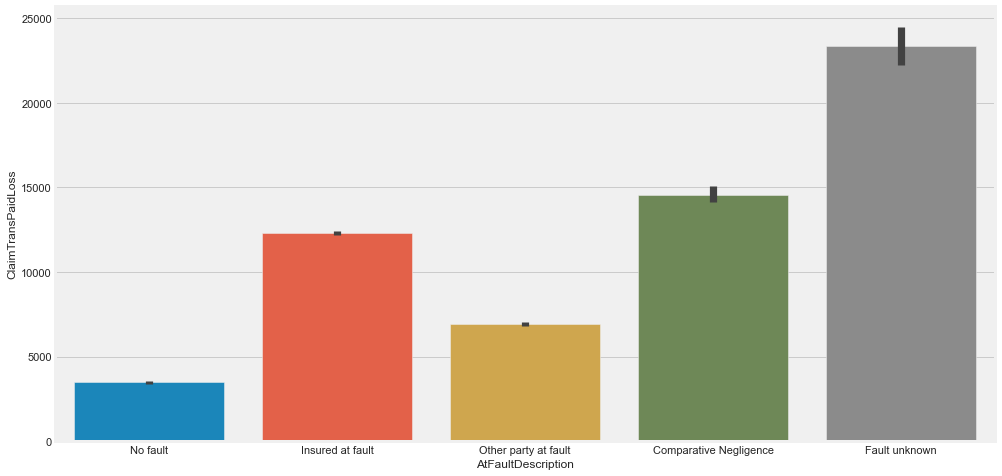

In [369]:
#Code Block 10
#Create BarPlot from ClaimMasterTrans for Faultdescription and ClaimTransPaidLoss
plt.figure(figsize =(15,8))
fig1 = sns.barplot(x='AtFaultDescription', y='ClaimTransPaidLoss', data=df_ClaimMasterTrans)

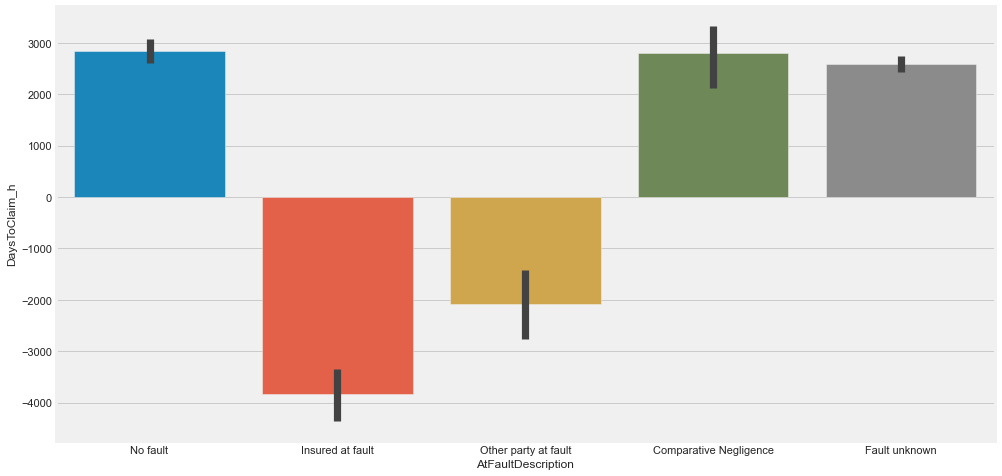

In [370]:
#Code Block 11
#Create Barplot showing relationship between DayToClaimh and FaultDescription
plt.figure(figsize =(15,8))
fig1 = sns.barplot(x='AtFaultDescription', y='DaysToClaim_h', data=df_ClaimMasterTrans)

###### Summary
- In this section I created ClaimMasterTrans by merging DataFrames ClaimMaster and ClaimTrans, droping unwanted columns from the dataframes, creating columns from calculated values and changed columns in to appropriate datatypes. From the ClaimMasterTrans Dataframe I created a two barplots to show the relationship between the Atfaultdescription and DaysToClaim_h and ClaimTransPaidLoss. From the BarPlots I was able to tell that Clients with unkwown faults generate the most paidloss and of all the drivers they take the shortest time to file for a Claim. The ones insured at fault and other parties at fault have negative days to Claim. When I looked at the dataframe their term effective date it as a future date as compared to DateofLoss. I was not able to determine why that was so. My initial reason for anaylsis was to find out the group that claims the most money and if there was a relation to the time they take too do so. Since it takes less foe the fault uknown drivers I considered that the Insurance agency is certain they cannot determine the cause and refunds the customer or they rule it in their favor as a form of courtesy. The Drivers with comperative negligence take the most time to Claim as they are trying to dispute the claim in their favor.

## Policy Contact 
- In this section we create the Policy Contact DataFrame from the policy contact csv file

In [371]:
#Code Block 12
#import data from csv file to create dataframe
df_PolicyContact = pd.read_csv('Data/PolicyContact.csv', index_col = None, header = 0)
df_PolicyContact

,AbilitecContactID,Right_PolicyNumber,DriverNumber,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID
0,04ZJUS010007RVDN,T0gzNDMxMDc0,1,04ZJUS010007RVDN,04ZJUS03P09TJ4HD,04ZJUS03P09TJ4HD
1,04ZJUS010007RVDN,T0gzNDMxMDc0,1,04ZJUS010007RVDN,04ZJUS03P09TJ4HD,04ZJUS03P09TJ4HD
2,04ZJUS010015G63F,T0g0MjgxMjIz,2,04ZJUS010015G63F,04ZJUS03W23MV15E,04ZJUS03GX99YKJV
3,04ZJUS01005BEBRF,Rkw0MjgyMjE0,2,04ZJUS01005BEBRF,04ZJUS03MRHWNH8L,04ZJUS03MRHWNH8L
4,04ZJUS01005NDVFB,TU40MjkyMjY1,2,04ZJUS01005NDVFB,04ZJUS03G9QQLD4R,04ZJUS03G9QQLD4R
...,...,...,...,...,...,...
77485,04ZJUS11ZZQL8WR4,UEEzNjk0MzQ2,2,04ZJUS11ZZQL8WR4,04ZJUS039V25G2PS,04ZJUS039V25G2PS
77486,04ZJUS11ZZQN6E29,Rkw0MzAzMDk0,2,04ZJUS11ZZQN6E29,04ZJUS03K20H6RT7,04ZJUS03K20H6RT7
77487,04ZJUS11ZZT1XXYJ,V1I0MTA1MjMy,2,04ZJUS11ZZT1XXYJ,04ZJUS03DWC5LR6R,04ZJUS03DWC5LR6R
77488,04ZJUS11ZZV842QB,QUw0MDQyNjU5,3,04ZJUS11ZZV842QB,04ZJUS03G4X4NMHK,04ZJUS03G4X4NMHK


In [372]:
#Code Block 13
#Sort values by Policy Number and driver number 
df_PolicyContact = df_PolicyContact.sort_values(['Right_PolicyNumber', 'DriverNumber'], ascending=(True, True))
df_PolicyContact

,AbilitecContactID,Right_PolicyNumber,DriverNumber,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID
29922,04ZJUS01XEYDG9QF,Q080MDA2MDUz,1,04ZJUS01XEYDG9QF,04ZJUS0356VDYBTY,04ZJUS0356VDYBTY
24421,04ZJUS01QW3YR5MP,Q080MDA2NDE5,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,04ZJUS03XEVQDN5Q
70461,04ZJUS11402YYSK0,Q080MDA2NDE5,2,04ZJUS11402YYSK0,04ZJUS03XEVQDN5Q,04ZJUS03XEVQDN5Q
5481,04ZJUS0143LMD00Z,Q080MDA2ODM3,1,04ZJUS0143LMD00Z,04ZJUS03QVT5HVY8,04ZJUS03QVT5HVY8
71472,04ZJUS117G4VY1QT,Q080MDA3Nzky,1,04ZJUS117G4VY1QT,04ZJUS034E00L23R,04ZJUS034E00L23R
...,...,...,...,...,...,...
5241,04ZJUS013XX7Q97C,VlQzOTkyMDU0,1,04ZJUS013XX7Q97C,04ZJUS03ZKB91XWF,04ZJUS03ZKB91XWF
50364,04ZJUS02HGZDGEGW,VlQzOTkyMDU0,2,04ZJUS02HGZDGEGW,04ZJUS03ZKB91XWF,04ZJUS03ZKB91XWF
42965,04ZJUS0296MBB29F,VlQzOTkyMDU0,3,04ZJUS0296MBB29F,04ZJUS03ZKB91XWF,04ZJUS03ZKB91XWF
39053,04ZJUS024SVCYMM9,VlQzOTkzMjM5,1,04ZJUS024SVCYMM9,04ZJUS03Z953F8G7,04ZJUS03Z953F8G7


In [373]:
#Code Block 14
#Drop Duplicates by PolicyNumber
df_PolicyContact.drop_duplicates (subset ='Right_PolicyNumber', keep='first', inplace= True)
df_PolicyContact

,AbilitecContactID,Right_PolicyNumber,DriverNumber,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID
29922,04ZJUS01XEYDG9QF,Q080MDA2MDUz,1,04ZJUS01XEYDG9QF,04ZJUS0356VDYBTY,04ZJUS0356VDYBTY
24421,04ZJUS01QW3YR5MP,Q080MDA2NDE5,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,04ZJUS03XEVQDN5Q
5481,04ZJUS0143LMD00Z,Q080MDA2ODM3,1,04ZJUS0143LMD00Z,04ZJUS03QVT5HVY8,04ZJUS03QVT5HVY8
71472,04ZJUS117G4VY1QT,Q080MDA3Nzky,1,04ZJUS117G4VY1QT,04ZJUS034E00L23R,04ZJUS034E00L23R
56271,04ZJUS02NNX4E5CQ,Q080MDA5OTky,1,04ZJUS02NNX4E5CQ,04ZJUS03135C7LL6,04ZJUS03135C7LL6
...,...,...,...,...,...,...
13495,04ZJUS01DFFG46J5,VlQzOTg4ODYz,1,04ZJUS01DFFG46J5,04ZJUS03NTYMYECF,04ZJUS03NTYMYECF
16891,04ZJUS01GYD939L3,VlQzOTgwMDgy,1,04ZJUS01GYD939L3,04ZJUS03YDKR4SD3,04ZJUS03YDKR4SD3
17131,04ZJUS01H4ZH92P7,VlQzOTgxNTAw,1,04ZJUS01H4ZH92P7,04ZJUS03N1L2LYER,04ZJUS03N1L2LYER
5241,04ZJUS013XX7Q97C,VlQzOTkyMDU0,1,04ZJUS013XX7Q97C,04ZJUS03ZKB91XWF,04ZJUS03ZKB91XWF


In [374]:
df_PolicyContact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36368 entries, 29922 to 39053
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AbilitecContactID        36368 non-null  object
 1   Right_PolicyNumber       36368 non-null  object
 2   DriverNumber             36368 non-null  int64 
 3   Right_AbilitecContactID  36368 non-null  object
 4   AbilitecHouseholdID      36368 non-null  object
 5   AbilitecAddressID        36368 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [375]:
#Code Block 15
#Create DriverCount
DriverCount = df_PolicyContact.groupby(['Right_PolicyNumber'])['DriverNumber'].count()
DriverCount


Right_PolicyNumber
Q080MDA2MDUz    1
Q080MDA2NDE5    1
Q080MDA2ODM3    1
Q080MDA3Nzky    1
Q080MDA5OTky    1
               ..
VlQzOTg4ODYz    1
VlQzOTgwMDgy    1
VlQzOTgxNTAw    1
VlQzOTkyMDU0    1
VlQzOTkzMjM5    1
Name: DriverNumber, Length: 36368, dtype: int64

In [376]:
#Code Block 16
#Create df_driverCount
df_DriverCount = pd.DataFrame(DriverCount)
  

In [377]:
#Code Block 17
#Create Claim count
ClaimCount = df_ClaimMaster.groupby(['PolicyNumber'])['ClaimNumber'].count()
df_ClaimCount = pd.DataFrame(ClaimCount)

df_ClaimCount

,ClaimNumber
PolicyNumber,
Q080MDE1MTY2,1
Q080MDEwOTEx,1
Q080MDExOTIz,1
Q080MDIyMDcw,3
Q080MDMyMTI3,1
...,...
VlQzOTQzOTAy,1
VlQzOTc5NTgz,1
VlQzOTcyODE2,1


In [378]:
#Code Block 18
#Create TotalPaid dataframe
TotalPaid = df_ClaimTrans.groupby(['PolicyNumber'])['ClaimTransPaidLoss'].sum()
df_TotalPaid = pd.DataFrame(TotalPaid)
df_TotalPaid

,ClaimTransPaidLoss
PolicyNumber,
Q080MDE1MTY2,45779.49
Q080MDEwOTEx,0.00
Q080MDExOTIz,1134080.22
Q080MDIyMDcw,0.00
Q080MDMyMTI3,0.00
...,...
VlQzOTMwMDMw,47330.34
VlQzOTQzOTAy,0.00
VlQzOTcyODE2,25887.42


In [379]:
#Code Block 19
#Merge df_DriverCount to df_PolicyContact
df_PolicyContact = pd.merge(df_PolicyContact, df_DriverCount, how ='inner', on='Right_PolicyNumber')
df_PolicyContact

,AbilitecContactID,Right_PolicyNumber,DriverNumber_x,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID,DriverNumber_y
0,04ZJUS01XEYDG9QF,Q080MDA2MDUz,1,04ZJUS01XEYDG9QF,04ZJUS0356VDYBTY,04ZJUS0356VDYBTY,1
1,04ZJUS01QW3YR5MP,Q080MDA2NDE5,1,04ZJUS01QW3YR5MP,04ZJUS03B7YGD1HL,04ZJUS03XEVQDN5Q,1
2,04ZJUS0143LMD00Z,Q080MDA2ODM3,1,04ZJUS0143LMD00Z,04ZJUS03QVT5HVY8,04ZJUS03QVT5HVY8,1
3,04ZJUS117G4VY1QT,Q080MDA3Nzky,1,04ZJUS117G4VY1QT,04ZJUS034E00L23R,04ZJUS034E00L23R,1
4,04ZJUS02NNX4E5CQ,Q080MDA5OTky,1,04ZJUS02NNX4E5CQ,04ZJUS03135C7LL6,04ZJUS03135C7LL6,1
...,...,...,...,...,...,...,...
36363,04ZJUS01DFFG46J5,VlQzOTg4ODYz,1,04ZJUS01DFFG46J5,04ZJUS03NTYMYECF,04ZJUS03NTYMYECF,1
36364,04ZJUS01GYD939L3,VlQzOTgwMDgy,1,04ZJUS01GYD939L3,04ZJUS03YDKR4SD3,04ZJUS03YDKR4SD3,1
36365,04ZJUS01H4ZH92P7,VlQzOTgxNTAw,1,04ZJUS01H4ZH92P7,04ZJUS03N1L2LYER,04ZJUS03N1L2LYER,1
36366,04ZJUS013XX7Q97C,VlQzOTkyMDU0,1,04ZJUS013XX7Q97C,04ZJUS03ZKB91XWF,04ZJUS03ZKB91XWF,1


In [380]:
#Code block 20
#Merge df_ClaimCount to df_PolicyContact
df_PolicyContact = pd.merge(df_PolicyContact, df_ClaimCount, left_on='Right_PolicyNumber', right_on='PolicyNumber')
df_PolicyContact

,AbilitecContactID,Right_PolicyNumber,DriverNumber_x,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID,DriverNumber_y,ClaimNumber
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS02EXPR09CB,04ZJUS0300X496LW,04ZJUS0300X496LW,1,1
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS0146KL4TTS,04ZJUS035SBF0GJ4,04ZJUS035SBF0GJ4,1,1
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS02K2KC7DMW,04ZJUS035ZXBZEH1,04ZJUS035ZXBZEH1,1,1
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS022XH2NVJ5,04ZJUS038P3W5KKR,04ZJUS038P3W5KKR,1,3
4,04ZJUS01PJ7NYRPY,Q080MDMyMTI3,1,04ZJUS01PJ7NYRPY,04ZJUS03XZ9CZ9TP,04ZJUS03XZ9CZ9TP,1,1
...,...,...,...,...,...,...,...,...
7831,04ZJUS01E9Y3261W,VlQzOTQzOTAy,1,04ZJUS01E9Y3261W,04ZJUS03ETSDL0BR,04ZJUS03ETSDL0BR,1,1
7832,04ZJUS020YQDGQSJ,VlQzOTc5NTgz,1,04ZJUS020YQDGQSJ,04ZJUS03S7B0E68L,04ZJUS03FJQPE8J5,1,1
7833,04ZJUS11XYCBBER5,VlQzOTcyODE2,1,04ZJUS11XYCBBER5,04ZJUS03B7H1T2PQ,04ZJUS03B7H1T2PQ,1,1
7834,04ZJUS022QSF2Q0W,VlQzOTg0NzI5,1,04ZJUS022QSF2Q0W,04ZJUS03YRGRQGJ6,04ZJUS03YRGRQGJ6,1,1


In [381]:
#Code Block 21
#Merge df_TotalPaid to df_PolicyContact
df_PolicyContact = pd.merge(df_PolicyContact, df_TotalPaid, left_on='Right_PolicyNumber', right_on='PolicyNumber')
df_PolicyContact

,AbilitecContactID,Right_PolicyNumber,DriverNumber_x,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID,DriverNumber_y,ClaimNumber,ClaimTransPaidLoss
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS02EXPR09CB,04ZJUS0300X496LW,04ZJUS0300X496LW,1,1,45779.49
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS0146KL4TTS,04ZJUS035SBF0GJ4,04ZJUS035SBF0GJ4,1,1,0.00
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS02K2KC7DMW,04ZJUS035ZXBZEH1,04ZJUS035ZXBZEH1,1,1,1134080.22
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS022XH2NVJ5,04ZJUS038P3W5KKR,04ZJUS038P3W5KKR,1,3,0.00
4,04ZJUS01PJ7NYRPY,Q080MDMyMTI3,1,04ZJUS01PJ7NYRPY,04ZJUS03XZ9CZ9TP,04ZJUS03XZ9CZ9TP,1,1,0.00
...,...,...,...,...,...,...,...,...,...
7044,04ZJUS024Y493BMM,VlQzOTMwMDMw,1,04ZJUS024Y493BMM,04ZJUS033CD74SM5,04ZJUS03LKL4M2C0,1,2,47330.34
7045,04ZJUS01E9Y3261W,VlQzOTQzOTAy,1,04ZJUS01E9Y3261W,04ZJUS03ETSDL0BR,04ZJUS03ETSDL0BR,1,1,0.00
7046,04ZJUS11XYCBBER5,VlQzOTcyODE2,1,04ZJUS11XYCBBER5,04ZJUS03B7H1T2PQ,04ZJUS03B7H1T2PQ,1,1,25887.42
7047,04ZJUS022QSF2Q0W,VlQzOTg0NzI5,1,04ZJUS022QSF2Q0W,04ZJUS03YRGRQGJ6,04ZJUS03YRGRQGJ6,1,1,0.00


In [382]:
#Code Block 22
#Drop duplicate column in df_PolicyContact
df_PolicyContact.drop(['Right_AbilitecContactID','AbilitecAddressID'], axis=1, inplace=True)

#Rename columns
df_PolicyContact = df_PolicyContact.rename(columns={'DriverNumber_x': 'DriverNumber'})
df_PolicyContact = df_PolicyContact.rename(columns={'ClaimNumber': 'ClaimCount'})
df_PolicyContact = df_PolicyContact.rename(columns={'ClaimTransPaidLoss': 'TotalPaid'})
df_PolicyContact = df_PolicyContact.rename(columns={'Right_PolicyNumber': 'PolicyNumber'})
df_PolicyContact = df_PolicyContact.rename(columns={'DriverNumber_y': 'DriverCount'})

#Change ClaimCount to float
df_PolicyContact['ClaimCount'] = df_PolicyContact['ClaimCount'].astype(float)


#df_Policy details
df_PolicyContact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 7048
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    7049 non-null   object 
 1   PolicyNumber         7049 non-null   object 
 2   DriverNumber         7049 non-null   int64  
 3   AbilitecHouseholdID  7049 non-null   object 
 4   DriverCount          7049 non-null   int64  
 5   ClaimCount           7049 non-null   float64
 6   TotalPaid            7049 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 440.6+ KB


In [383]:
df_PolicyContact.sample(10)

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid
4196,04ZJUS02FY32X0L6,TVMxOTIyMTY0,1,04ZJUS03EKVQJY5R,1,2.0,255275.45
2124,04ZJUS02K5G3ZGJK,Rkw0MjIxNDAx,1,04ZJUS038PTY0R2S,1,1.0,553733.60
1420,04ZJUS02141NYZ58,QVoyNDk2MjEz,1,04ZJUS03065K25EZ,1,2.0,3002.50
2422,04ZJUS02XY1X3LL2,RkwzOTQ0MTUz,2,04ZJUS036L80BD96,1,1.0,7146.20
1559,04ZJUS02W5N2XJJW,QVozOTc1MTQ5,1,04ZJUS136JXPLQKV,1,1.0,5688.66
1174,04ZJUS02JZFW4NLR,QUwzNTExMjAx,1,04ZJUS039202DZGW,1,2.0,6133.20
3974,04ZJUS02RYJ03PZ5,TU8zMTE0MDM0,1,04ZJUS03YSKJ4DTW,1,2.0,67832.75
6576,04ZJUS016VGNDXGW,VFgyODQ4MDQy,1,04ZJUS03HY0J31EM,1,1.0,72644.48
2059,04ZJUS0297HYRCJ5,Rkw0MDg1OTUx,1,04ZJUS03886QYTS7,1,1.0,3106.92
2977,04ZJUS02ZWBGD0JX,SUwzMzAzNjcz,1,04ZJUS031C0FMY45,1,2.0,37482.72


In [384]:
#Code Block 23
#Remove outliers 
df_PolicyContact.drop(df_PolicyContact[df_PolicyContact['TotalPaid']> 75000].index, inplace = True)

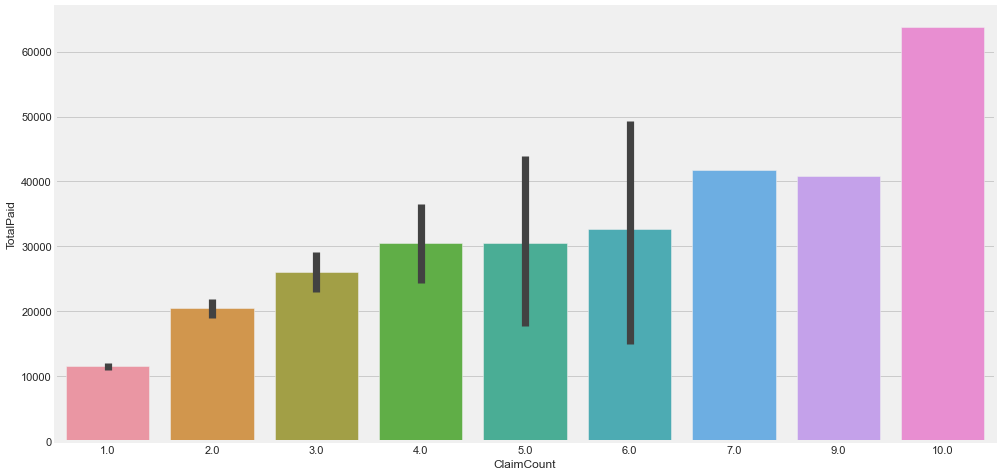

In [385]:
#Code Block 24
#Create barplot for claimcount and totalpaid
plt.figure(figsize =(15,8))
fig1 = sns.barplot(x='ClaimCount', y='TotalPaid', data=df_PolicyContact)

##### Summary
-In this section I created df_PolicyContact. We cleanse the data by dropping duplicates, renaming columns and creating new columns from calcutaions. I also removed outliers and created a Barplot that shows the relationship between ClaimCount and TotalPaid. There is linear relationship and it shows that totalpaid increases with the ClainCount. The relationship is there but I am not sure if there is that makes sense because if one files a lot of claims they are bound to be Paid more as compared to the ones that don't. I initially was hoping that the analysis would show that the TotalPaid would decrease as number of claims increases as one would be noted as a bad driver or someone prone to accidents. As a result they charge him more or give them less per claim 

## Master Quote
- In this section we create Master quote from the MasterQuote and QuoteContact csv files 

In [386]:
#Code Block 25
#Import MasterQuote csv file to create dataframes 
df_MasterQuote = pd.read_csv('Data/MasterQuote.csv', index_col = None, header = 0)
df_MasterQuote

C:\Users\Gedza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,21,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,QuoteNumber,QuoteID,MQuotedDownPayment,MQuotedPremium,MQuotedTotalPayment,MQuotesAll,MQuotesMobileBound,MQuotesMobileInitiated,MSalesPremium,MSales,AgencyInitiating,AgencySales,AgentNumber,AgentNumberBinding,AgentNumberBusinessChannel,AgentNumberInitiating,AgentNumberSales,AgentNumberValidating,AutoDebit,BiFcCoverageInd,BiPdCoverageLimits,ClosingLocation,ClosingMethod,CommissionTier,CompanyNumber,ConRepCvCompanyChanges,ConRepCvLapseDays,ConRepCvPriorCompanyType,ConRepCvPriorCoverageLimit,ConRepCvTenure,CoverageSubType,CoverageType,CoverageTypeDescription,DistributionChannel,DistributionChannelDescription,DriversActive,DriversExcluded,DsDwelling,DsDwellingDescription,DsExcludedDriver,DsExcludedDriverDescription,DsLimitedTort,DsMilitaryBenefit,DsMultiCar,DsMultiCarDescription,DsNonowner,DsPayPlan,DsPunitiveDamage,DsSelectDiscount,DsStarLevel,...,QuoteBound,QuoteBoundDayInMonth,QuoteBoundDayInWeek,QuoteBoundHour,QuoteBoundMonth,QuoteBoundQuarter,QuoteBoundTime,QuoteBoundTimeEff,QuoteBoundTimeMonthEff,QuoteBoundTimeQuarterEff,QuoteBoundTimeYearEff,QuotedDownPayment,QuotedPremium,QuotedTotalPayment,QuoteInitiatedDayInMonth,QuoteInitiatedDayInWeek,QuoteInitiatedHour,QuoteInitiatedMonth,QuoteInitiatedQuarter,QuoteInitiatedTime,QuoteInitiatedTimeEff,QuoteInitiatedTimeMmEff,QuoteInitiatedTimeQtrEff,QuoteInitiatedTimeYyEff,QuoteLastDayInMonth,QuoteLastDayInWeek,QuoteLastHour,QuoteLastMonth,QuoteLastQuarter,QuoteLastTime,QuoteLastTimeEff,QuoteLastTimeMmEff,QuoteLastTimeQtrEff,QuoteLastTimeYyEff,QuoteRated,RateBookCode,ReferralSourceCode,ReferralSourceDescription,RiskScoreNonCredit,Source,SourceOfSale,SourceOfSaleDescription,SourceOfSaleGroup,TermEffectiveDate,TermExpirationDate,Territory,TransferNormIndicator,VehiclesActive,VehiclesWithBI,VehiclesWithFullCoverage
0,MzM0MDA0OTE=,33053336,99.62,1011.00,1136.00,1,0,0,1011.0,1,998888,998888.0,998888,998888,998888,998888,998888.0,NaN,N,BI NOFC,25/50/20,NaN,NaN,Pinnacle,52,C2,L1,S,PL2,H4,Base,L,Liability Only,G,Internet,1,0,NaN,No Dwelling Discount,NaN,No Excluded Driver Surcharge,NaN,NaN,NaN,No Multi-Car Discount,NaN,NaN,NaN,NaN,E,...,Y,2,7,22,1,1,2016-01-02 22:36:32,2016-01-02 00:00:00,2016-01-01 00:00:00,20161,2016,99.62,1011.00,1136.00,2,7,22,1,1,2016-01-02 22:25:47,2016-01-02 00:00:00,2016-01-01 00:00:00,20161,2016,2,7,22,1,1,2016-01-02 22:34:26,2016-01-02 00:00:00,2016-01-01 00:00:00,20161,2016,Y,R53,SUR,Online Sure Hits (SUR),10.0,The General,2000OR,OR Internet Sales,Online Retail,2016-01-02 00:00:00,2017-01-02 00:00:00,42,Y,1,1,0
1,MzM0MDQxNzU=,33057259,0.00,0.00,0.00,1,0,1,0.0,0,998888,NaN,998888,NaN,998888,998888,NaN,NaN,NaN,NOBI NOFC,25/50/20,NaN,NaN,Pinnacle,37,NaN,NaN,NaN,NaN,NaN,Base,L,Liability Only,G,Internet,1,0,NaN,No Dwelling Discount,NaN,No Excluded Driver Surcharge,NaN,NaN,NaN,No Multi-Car Discount,NaN,NaN,NaN,NaN,B,...,N,1,1,1,1,1,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,19001,1900,0.00,0.00,0.00,3,1,12,1,1,2016-01-03 12:15:55,2016-01-03 00:00:00,2016-01-01 00:00:00,20161,2016,3,1,12,1,1,2016-01-03 12:24:25,2016-01-03 00:00:00,2016-01-01 00:00:00,20161,2016,N,R51,INT,Internet (INT),10.0,The General,2000IL,IL Internet Sales,Online Retail,2016-01-03 00:00:00,2017-01-03 00:00:00,0,Y,0,0,0
2,MzM0MTc2MTk=,33071581,156.70,1017.00,1160.00,1,1,1,1017.0,1,998888,998888.0,998888,998888,998888,998888,998888.0,NaN,N,BI NOFC,15/30/10,NaN,NaN,Pinnacle,78,C2,L3,N,PL2,H2,Base,L,Liability Only,G,Internet,2,0,NaN,No Dwelling Discount,NaN,No Excluded Driver Surcharge,NaN,NaN,NaN,No Multi-Car Discount,NaN,NaN,NaN,NaN,D,...,Y,4,2,11,1,1,2016-01-04 11:28:11,2016-01-04 00:00:00,2016-01-01 00:00:00,20161,2016,156.70,1017.00,1160.00,4,2,11,1,1,2016-01-04 11:10:58,2016-01-04 00:00:00,2016-01-01 00:00:00,20161,2016,4,2,11,1,1,2016-01-04 11:23:22,2016-01-04 00:00:00,2016-01-01 00:00:00,20161,2016,Y,R51,INT,Internet (INT),0.0,The General,2000NV,NV Internet Sales,Online Retail,2016-01-04 00:00:00,2017-01-04 00:00:00,53,N,1,1,0
3,MzM0MTc2MTk=,33071581,156.70,1017.00,1160.00,1,1,1,10

In [387]:
#Code Block 26
#import QuoteContact data from csv file to create dataframe
df_QuoteContact = pd.read_csv('Data/QuoteContact.csv', index_col = None, header = 0)
df_QuoteContact

,AbilitecContactID,Right_QuoteNumber,DriverNumber,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID
0,04ZJUS010007RVDN,NjA1Mzg1NTE=,1,04ZJUS010007RVDN,04ZJUS03P09TJ4HD,04ZJUS03P09TJ4HD
1,04ZJUS010007RVDN,NjA1Mzg1NTE=,1,04ZJUS010007RVDN,04ZJUS03P09TJ4HD,04ZJUS03P09TJ4HD
2,04ZJUS010007RVDN,Mzg4NjIyNjk=,1,04ZJUS010007RVDN,04ZJUS03S7K64KD6,04ZJUS03S7K64KD6
3,04ZJUS010007RVDN,Mzg4NjIyNjk=,1,04ZJUS010007RVDN,04ZJUS03S7K64KD6,04ZJUS03S7K64KD6
4,04ZJUS010007RVDN,NDIyMjgwNjA=,1,04ZJUS010007RVDN,04ZJUS03S7K64KD6,04ZJUS03S7K64KD6
...,...,...,...,...,...,...
61789,04ZJUS11ZYY4FSFC,NDYwMjU5NTc=,4,04ZJUS11ZYY4FSFC,04ZJUS03CSK9400X,04ZJUS03CSK9400X
61790,04ZJUS11ZZENL88Y,NjAyNTc5NTU=,2,04ZJUS11ZZENL88Y,04ZJUS03GZ6FZY81,04ZJUS03GZ6FZY81
61791,04ZJUS11ZZQN6E29,NjA0NDI4NTY=,2,04ZJUS11ZZQN6E29,04ZJUS03K20H6RT7,04ZJUS03K20H6RT7
61792,04ZJUS11ZZV842QB,NTQ4MzAxMzg=,3,04ZJUS11ZZV842QB,04ZJUS03G4X4NMHK,04ZJUS03G4X4NMHK


In [388]:
#Code block 27
#Sort values for QuoteContact 
df_QuoteContact = df_QuoteContact.sort_values(['Right_QuoteNumber', 'DriverNumber'], ascending=(True, True))
df_QuoteContact

,AbilitecContactID,Right_QuoteNumber,DriverNumber,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID
30899,04ZJUS0220X4MKG7,MzM0MDA0OTE=,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,04ZJUS033FV1YJP0
53930,04ZJUS02W4N0B2J5,MzM0MDQxNzU=,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,04ZJUS03543132P3
16380,04ZJUS01KNTMYEQF,MzM0MTc2MTk=,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,04ZJUS03X6MXZ21T
16381,04ZJUS01KNTMYEQF,MzM0MTc2MTk=,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,04ZJUS03X6MXZ21T
55190,04ZJUS02XQ1DGSDW,MzM0MTk3MjQ=,2,04ZJUS02XQ1DGSDW,04ZJUS03ZDK4PGRF,04ZJUS03ZDK4PGRF
...,...,...,...,...,...,...
6513,04ZJUS0169W38WEX,NjUzOTM3MzQ=,1,04ZJUS0169W38WEX,04ZJUS03GSEE695S,04ZJUS03GSEE695S
6514,04ZJUS0169W38WEX,NjUzOTM3MzQ=,1,04ZJUS0169W38WEX,04ZJUS03GSEE695S,04ZJUS03GSEE695S
4622,04ZJUS013Z9VZ7DH,NjUzOTM3MzQ=,2,04ZJUS013Z9VZ7DH,04ZJUS03GSEE695S,04ZJUS03GSEE695S
4623,04ZJUS013Z9VZ7DH,NjUzOTM3MzQ=,2,04ZJUS013Z9VZ7DH,04ZJUS03GSEE695S,04ZJUS03GSEE695S


In [389]:
#Code Block 27
#Drop Duplicates by QuoteNumber
df_QuoteContact.drop_duplicates (subset ='Right_QuoteNumber', keep='first', inplace= True)
df_QuoteContact

,AbilitecContactID,Right_QuoteNumber,DriverNumber,Right_AbilitecContactID,AbilitecHouseholdID,AbilitecAddressID
30899,04ZJUS0220X4MKG7,MzM0MDA0OTE=,1,04ZJUS0220X4MKG7,04ZJUS033FV1YJP0,04ZJUS033FV1YJP0
53930,04ZJUS02W4N0B2J5,MzM0MDQxNzU=,1,04ZJUS02W4N0B2J5,04ZJUS03543132P3,04ZJUS03543132P3
16380,04ZJUS01KNTMYEQF,MzM0MTc2MTk=,1,04ZJUS01KNTMYEQF,04ZJUS03X6MXZ21T,04ZJUS03X6MXZ21T
55190,04ZJUS02XQ1DGSDW,MzM0MTk3MjQ=,2,04ZJUS02XQ1DGSDW,04ZJUS03ZDK4PGRF,04ZJUS03ZDK4PGRF
32287,04ZJUS023RYMYKKP,MzM0MjAxMjU=,1,04ZJUS023RYMYKKP,04ZJUS036201CX3G,04ZJUS036201CX3G
...,...,...,...,...,...,...
46539,04ZJUS02MVV5YT0C,NjUzODg5NzY=,1,04ZJUS02MVV5YT0C,04ZJUS03FFTGD3EE,04ZJUS03FFTGD3EE
49491,04ZJUS02QK8MJM5F,NjUzOTE5Mjg=,1,04ZJUS02QK8MJM5F,04ZJUS039Z15ZJLQ,04ZJUS039Z15ZJLQ
19726,04ZJUS01PZ3G4PJ5,NjUzOTI4ODg=,1,04ZJUS01PZ3G4PJ5,04ZJUS13H4G2GJMT,04ZJUS039XB0DDMB
6513,04ZJUS0169W38WEX,NjUzOTM3MzQ=,1,04ZJUS0169W38WEX,04ZJUS03GSEE695S,04ZJUS03GSEE695S


In [390]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61109 entries, 0 to 61108
Columns: 132 entries, QuoteNumber to VehiclesWithFullCoverage
dtypes: float64(14), int64(42), object(76)
memory usage: 61.5+ MB


In [391]:
#Code Block 28
#Eliminate extra columns df_MasterQuote
df_MasterQuote = df_MasterQuote[['QuoteNumber','MQuotedTotalPayment','BiFcCoverageInd', 'CoverageTypeDescription', 'DriversActive','GaragingState','NamedInsuredMaritalStatus','PolicyNumber','PolicyStateCode','PolicyTerm','QuoteInitiatedTime','TermEffectiveDate','TermExpirationDate']]
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61109 entries, 0 to 61108
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                61109 non-null  object 
 1   MQuotedTotalPayment        61109 non-null  float64
 2   BiFcCoverageInd            61109 non-null  object 
 3   CoverageTypeDescription    61109 non-null  object 
 4   DriversActive              61109 non-null  int64  
 5   GaragingState              61109 non-null  object 
 6   NamedInsuredMaritalStatus  61109 non-null  object 
 7   PolicyNumber               37211 non-null  object 
 8   PolicyStateCode            61109 non-null  object 
 9   PolicyTerm                 61109 non-null  int64  
 10  QuoteInitiatedTime         61109 non-null  object 
 11  TermEffectiveDate          61109 non-null  object 
 12  TermExpirationDate         61109 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usa

In [392]:
#Code Block 29
#Change TermEffectiveDate and TermExpirationDate to Datetime
df_MasterQuote['TermExpirationDate'] = pd.to_datetime(df_MasterQuote['TermExpirationDate'])
df_MasterQuote['TermEffectiveDate'] = pd.to_datetime(df_MasterQuote['TermEffectiveDate'])
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61109 entries, 0 to 61108
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   QuoteNumber                61109 non-null  object        
 1   MQuotedTotalPayment        61109 non-null  float64       
 2   BiFcCoverageInd            61109 non-null  object        
 3   CoverageTypeDescription    61109 non-null  object        
 4   DriversActive              61109 non-null  int64         
 5   GaragingState              61109 non-null  object        
 6   NamedInsuredMaritalStatus  61109 non-null  object        
 7   PolicyNumber               37211 non-null  object        
 8   PolicyStateCode            61109 non-null  object        
 9   PolicyTerm                 61109 non-null  int64         
 10  QuoteInitiatedTime         61109 non-null  object        
 11  TermEffectiveDate          61109 non-null  datetime64[ns]
 12  Term

<ipython-input-392-70316bc5b061>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MasterQuote['TermExpirationDate'] = pd.to_datetime(df_MasterQuote['TermExpirationDate'])
<ipython-input-392-70316bc5b061>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MasterQuote['TermEffectiveDate'] = pd.to_datetime(df_MasterQuote['TermEffectiveDate'])


In [393]:
df_QuoteContact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35377 entries, 30899 to 8291
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AbilitecContactID        35377 non-null  object
 1   Right_QuoteNumber        35377 non-null  object
 2   DriverNumber             35377 non-null  int64 
 3   Right_AbilitecContactID  35377 non-null  object
 4   AbilitecHouseholdID      35377 non-null  object
 5   AbilitecAddressID        35377 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [394]:
#Code Block 30
#Create DriverNumber
DriverCount = df_QuoteContact.groupby(['Right_QuoteNumber'])['DriverNumber'].count()
DriverCount

Right_QuoteNumber
MzM0MDA0OTE=    1
MzM0MDQxNzU=    1
MzM0MTc2MTk=    1
MzM0MTk3MjQ=    1
MzM0MjAxMjU=    1
               ..
NjUzODg5NzY=    1
NjUzOTE5Mjg=    1
NjUzOTI4ODg=    1
NjUzOTM3MzQ=    1
NjUzOTMxMjc=    1
Name: DriverNumber, Length: 35377, dtype: int64

In [395]:
#Code Block 31
#Create dataframe for DriverCount and rename colummns
df_DriverCount = pd.DataFrame(DriverCount)
df_DriverCount = df_DriverCount.rename(columns={'DriverNumber':'DriverCount'})

In [396]:
#Code Block 32
#Merge df_Driver to df_QuoteContact
df_QuoteContact = pd.merge(df_QuoteContact, df_DriverCount, on ='Right_QuoteNumber')

In [397]:
#Code block 33
#Drop Duplicates
df_QuoteContact.drop(['Right_AbilitecContactID','AbilitecAddressID'], axis=1, inplace=True)
df_QuoteContact

,AbilitecContactID,Right_QuoteNumber,DriverNumber,AbilitecHouseholdID,DriverCount
0,04ZJUS0220X4MKG7,MzM0MDA0OTE=,1,04ZJUS033FV1YJP0,1
1,04ZJUS02W4N0B2J5,MzM0MDQxNzU=,1,04ZJUS03543132P3,1
2,04ZJUS01KNTMYEQF,MzM0MTc2MTk=,1,04ZJUS03X6MXZ21T,1
3,04ZJUS02XQ1DGSDW,MzM0MTk3MjQ=,2,04ZJUS03ZDK4PGRF,1
4,04ZJUS023RYMYKKP,MzM0MjAxMjU=,1,04ZJUS036201CX3G,1
...,...,...,...,...,...
35372,04ZJUS02MVV5YT0C,NjUzODg5NzY=,1,04ZJUS03FFTGD3EE,1
35373,04ZJUS02QK8MJM5F,NjUzOTE5Mjg=,1,04ZJUS039Z15ZJLQ,1
35374,04ZJUS01PZ3G4PJ5,NjUzOTI4ODg=,1,04ZJUS13H4G2GJMT,1
35375,04ZJUS0169W38WEX,NjUzOTM3MzQ=,1,04ZJUS03GSEE695S,1


In [398]:
#Code Block 34
#Merge df_QouteContact to df_MasterQuote
df_MasterQuote = pd.merge(df_MasterQuote, df_QuoteContact, left_on='QuoteNumber', right_on='Right_QuoteNumber')
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,Right_QuoteNumber,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02,2017-01-02,04ZJUS0220X4MKG7,MzM0MDA0OTE=,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03,2017-01-03,04ZJUS02W4N0B2J5,MzM0MDQxNzU=,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04,2017-01-04,04ZJUS01KNTMYEQF,MzM0MTc2MTk=,1,04ZJUS03X6MXZ21T,1
3,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04,2017-01-04,04ZJUS01KNTMYEQF,MzM0MTc2MTk=,1,04ZJUS03X6MXZ21T,1
4,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26,2017-01-26,04ZJUS02XQ1DGSDW,MzM0MTk3MjQ=,2,04ZJUS03ZDK4PGRF,1


In [399]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61109 entries, 0 to 61108
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   QuoteNumber                61109 non-null  object        
 1   MQuotedTotalPayment        61109 non-null  float64       
 2   BiFcCoverageInd            61109 non-null  object        
 3   CoverageTypeDescription    61109 non-null  object        
 4   DriversActive              61109 non-null  int64         
 5   GaragingState              61109 non-null  object        
 6   NamedInsuredMaritalStatus  61109 non-null  object        
 7   PolicyNumber               37211 non-null  object        
 8   PolicyStateCode            61109 non-null  object        
 9   PolicyTerm                 61109 non-null  int64         
 10  QuoteInitiatedTime         61109 non-null  object        
 11  TermEffectiveDate          61109 non-null  datetime64[ns]
 12  Term

In [400]:
#Code Block 35
#Drop Right_QuoteNumber
df_MasterQuote.drop(['Right_QuoteNumber'], axis=1, inplace=True)
df_MasterQuote

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.00,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02,2017-01-02,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.00,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03,2017-01-03,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.00,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04,2017-01-04,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,1
3,MzM0MTc2MTk=,1160.00,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04,2017-01-04,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,1
4,MzM0MTk3MjQ=,3054.00,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26,2017-01-26,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61104,NjUzOTM3MzQ=,1207.00,BI NOFC,Liability Only,2,KS,Married,NaN,KS,12,2019-05-06 15:28:55,2019-05-29,2020-05-29,04ZJUS0169W38WEX,1,04ZJUS03GSEE695S,1
61105,NjUzOTM3MzQ=,1207.00,BI NOFC,Liability Only,2,KS,Married,NaN,KS,12,2019-05-06 15:28:55,2019-05-29,2020-05-29,04ZJUS0169W38WEX,1,04ZJUS03GSEE695S,1
61106,NjUzOTM3MzQ=,1207.00,BI NOFC,Liability Only,2,KS,Married,NaN,KS,12,2019-05-06 15:28:55,2019-05-29,2020-05-29,04ZJUS0169W38WEX,1,04ZJUS03GSEE695S,1
61107,NjUzOTM3MzQ=,1207.00,BI NOFC,Liability Only,2,KS,Married,NaN,KS,12,2019-05-06 15:28:55,2019-05-29,2020-05-29,04ZJUS0169W38WEX,1,04ZJUS03GSEE695S,1


<AxesSubplot:xlabel='MQuotedTotalPayment', ylabel='NamedInsuredMaritalStatus'>

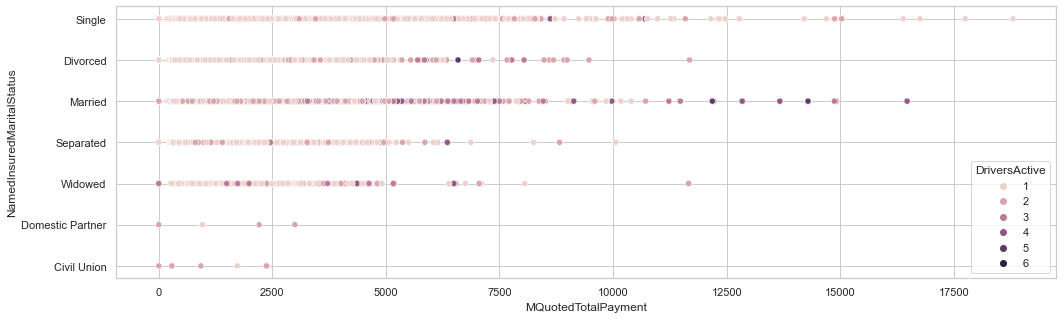

In [401]:
#Code Block 36
# Create BoxPlot to relationship between MQuoted Total Payment and Marital status and Drivers Active
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_MasterQuote, x='MQuotedTotalPayment', y='NamedInsuredMaritalStatus', hue='DriversActive')

##### Summary 
- In this Section I created MaterQuote and QuoteContact dataframes. I then cleaned the dataframes by droping duplicates and unwanted columns. I then merged the two dataframes to create the final dataframe and created new columns with calculated values such as DiverCount. I then created a scatter plot to show the relationship between the Marital status, MQuotedTotalPayment and number of drivers. From the vizualation you can see that for each category the Marital status with the highest number of drivers has a higher QuotedTotalPayment of those Married, seperated and Widowed groups have a higher QuotedTotalPayments for more than 3 active drivers. I think that the insurance policy is taking into consideration the number of children and or partners that have access to policy for these specific groups and their increases the insurance Quoted payment. 

## df_General
- In this section we create df_general by merging df_PolicyContact and df_ClaimMaster

In [402]:
#Code Block 37
#Create df_General
df_General = pd.merge(df_PolicyContact, df_ClaimMasterTrans, how ='inner', on='PolicyNumber')
df_General.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,DaysToClaim,DaysToClaim_h,ClaimTransCount,ClaimTransPaidLoss
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,1,1.0,45779.49,PA0002364104,No fault,C,HAIL,2018-08-06,98,CO,CO,NO,2018-05-29,1,69.0,1656,9.0,5086.61
1,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,1,1.0,45779.49,PA0002364104,No fault,C,HAIL,2018-08-06,98,CO,CO,NO,2018-05-29,1,69.0,1656,9.0,5086.61
2,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,1,1.0,45779.49,PA0002364104,No fault,C,HAIL,2018-08-06,98,CO,CO,NO,2018-05-29,1,69.0,1656,9.0,5086.61
3,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,1,1.0,45779.49,PA0002364104,No fault,C,HAIL,2018-08-06,98,CO,CO,NO,2018-05-29,1,69.0,1656,9.0,5086.61
4,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,1,1.0,45779.49,PA0002364104,No fault,C,HAIL,2018-08-06,98,CO,CO,NO,2018-05-29,1,69.0,1656,9.0,5086.61


In [403]:
df_General.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44985 entries, 0 to 44984
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AbilitecContactID    44985 non-null  object        
 1   PolicyNumber         44985 non-null  object        
 2   DriverNumber         44985 non-null  int64         
 3   AbilitecHouseholdID  44985 non-null  object        
 4   DriverCount          44985 non-null  int64         
 5   ClaimCount           44985 non-null  float64       
 6   TotalPaid            44985 non-null  float64       
 7   ClaimNumber          44985 non-null  object        
 8   AtFaultDescription   44985 non-null  object        
 9   ClaimStatus          44985 non-null  object        
 10  ClaimType            44985 non-null  object        
 11  DateOfLoss           44985 non-null  datetime64[ns]
 12  DriverID             44985 non-null  int64         
 13  LossState            44985 non-

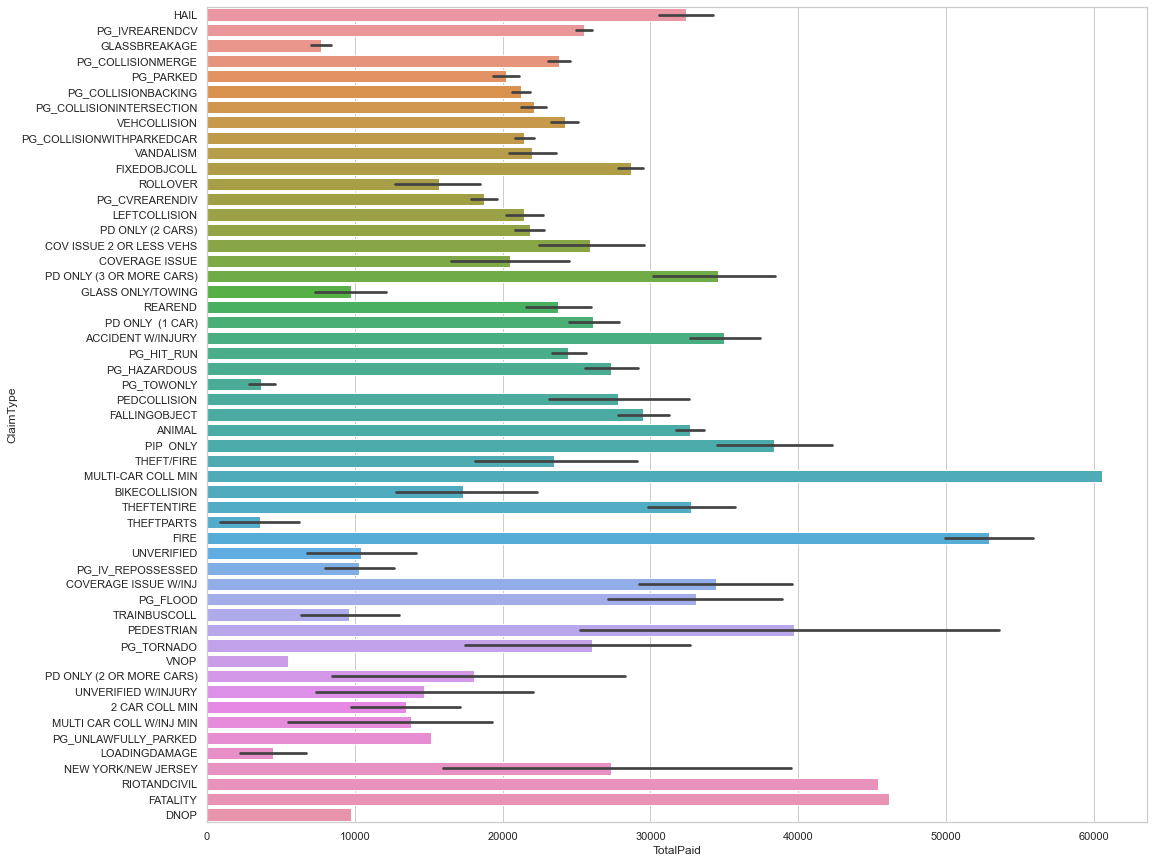

In [404]:
#Code Block 38
#Bar plot showing the total paid for claimtype
plt.figure(figsize =(15,15))
fig1 = sns.barplot(y='ClaimType', x='TotalPaid', data=df_General )  #, hue='AtFaultDescription')

<AxesSubplot:xlabel='ClaimTransCount', ylabel='ClaimTransPaidLoss'>

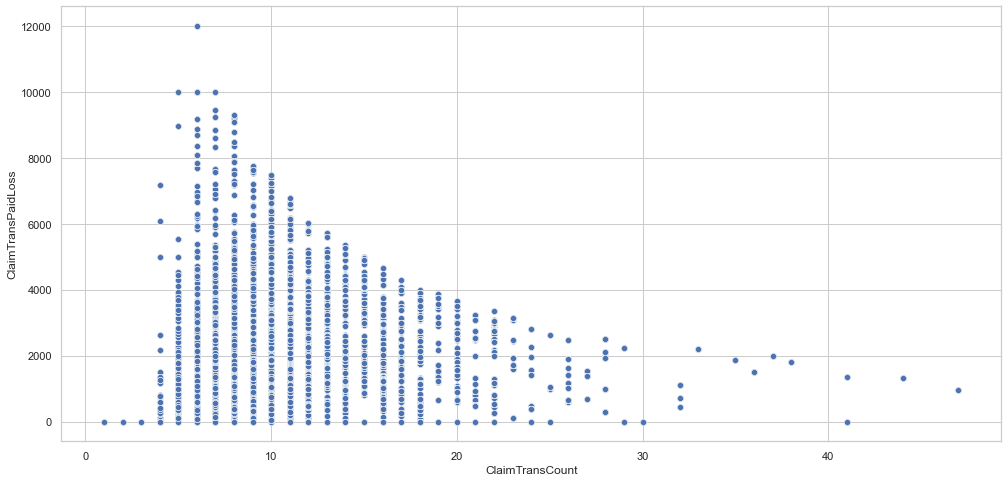

In [405]:
#Code Block 40
#Scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_General, x='ClaimTransCount', y='ClaimTransPaidLoss')

##### Summary 
- In this section I created the df_General Dataframe by merging df_PolicyContact and df_ClaimMasterTrans. I then created a barplot that shows the TotalPaid for ClaimType. In the visual you can see that the highest groups include, RiotandCivil, fatality, hail, multi car collision, fire and pedestrian. The lowest TotalPaid is for loadingDamage, TheftPart, PGTowOnly and Glass breakage. This visual shows that The General usually pays higher totals for fatal Claims and lower total for minor claims. I then created a scatter plot to show the relationship between ClaimTransPaidLoss and ClaimTranCount. The plot shows a negative linear relationship between the two and as the transction count increases the Paid loss decreases. This shows that the General considers the increase in number of claims as a form of negligence on the customer and hence reduces the amount they pay to cover for their damages.
